In [3]:
import os
os.environ['HOME']='C:'#os.environ['HOMEDRIVE']
os.environ['XUVTOP'] = 'C:\\CHIANTI_10.1_database'
import ChiantiPy
import ChiantiPy.core as ch
import ChiantiPy.tools.filters as chfilters
import ChiantiPy.tools.io as chio
import numpy as np
import matplotlib.pyplot as plt
# inline
%matplotlib inline
'''https://github.com/chianti-atomic/ChiantiPy'''

'https://github.com/chianti-atomic/ChiantiPy'

In [2]:
chianti_version = chio.versionRead()
chianti_version

'10.1'

using index =    10 specifying temperature =    2.00e+06


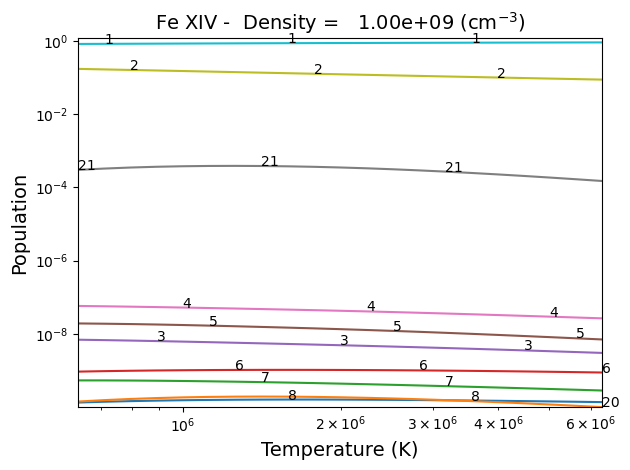

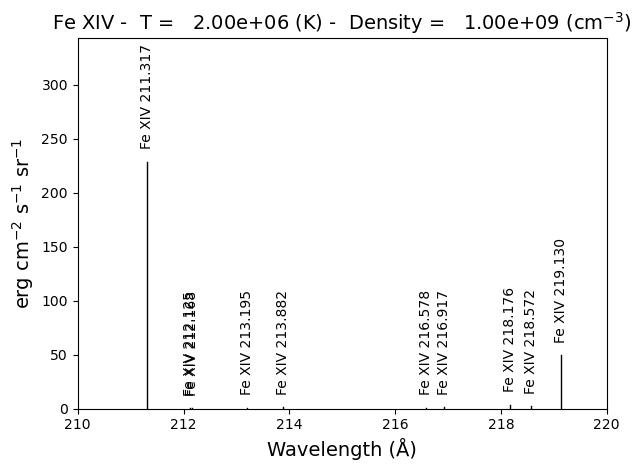

In [3]:
temp = 10.**(5.8 + 0.05*np.arange(21.))
fe14 = ch.ion('fe_14', temperature=temp, eDensity=1.e+9, em=1.e+27)
fe14.popPlot(addLegend=False)
fe14.intensityPlot(wvlRange=[210.,220.])

In [4]:
fe14.intensityList(wvlRange=[200,220], index=10)

using index =    10 specifying temperature =    2.00e+06
   
 ------------------------------------------
   
  Ion  lvl1  lvl2                     lower -                     upper      Wvl (Å)    Intensity      A value Obs
fe_14     1    11              3s2.3p 2P0.5 - 3s2.3d 2D1.5                  211.3170     2.29e+02     3.81e+10 Y
fe_14     4    27              3s.3p2 4P1.5 - 3s.3p(3P).3d 4P1.5            212.1250     5.24e-01     2.21e+10 Y
fe_14     4    28              3s.3p2 4P1.5 - 3s.3p(3P).3d 4D2.5            212.1680     3.96e-01     1.15e+10 Y
fe_14     3    24              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D0.5            213.1950     7.91e-01     4.26e+10 Y
fe_14     3    23              3s.3p2 4P0.5 - 3s.3p(3P).3d 4D1.5            213.8820     1.36e+00     2.97e+10 Y
fe_14     5    28              3s.3p2 4P2.5 - 3s.3p(3P).3d 4D2.5            216.5780     9.54e-01     2.83e+10 Y
fe_14     5    25              3s.3p2 4P2.5 - 3s.3p(3P).3d 4D3.5            216.9170     1.69e+00 

In [4]:
temp = 10.**(5.8 + 0.05*np.arange(21.))
dens = 1.e+9
fe14 = ch.ion('fe_14', temp, dens)

 wvl =    211.317 


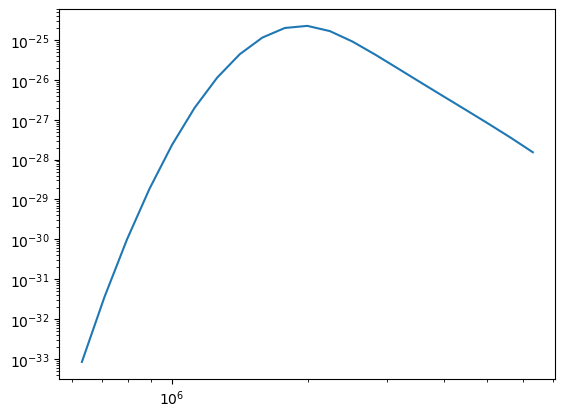

In [6]:
fe14.intensity()
dist = np.abs(np.asarray(fe14.Intensity['wvl']) - 211.3172)
idx = np.argmin(dist)
print(' wvl = %10.3f '%(fe14.Intensity['wvl'][idx]))
plt.loglog(temp,fe14.Intensity['intensity'][:,idx])

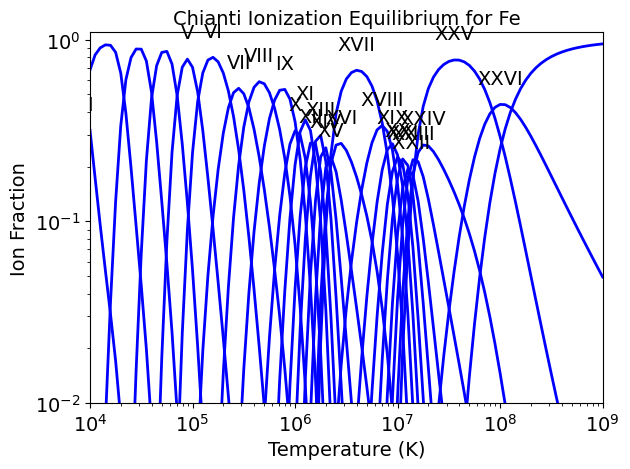

In [7]:
fe = ch.ioneq(26)
fe.load()
fe.plot()
plt.tight_layout()

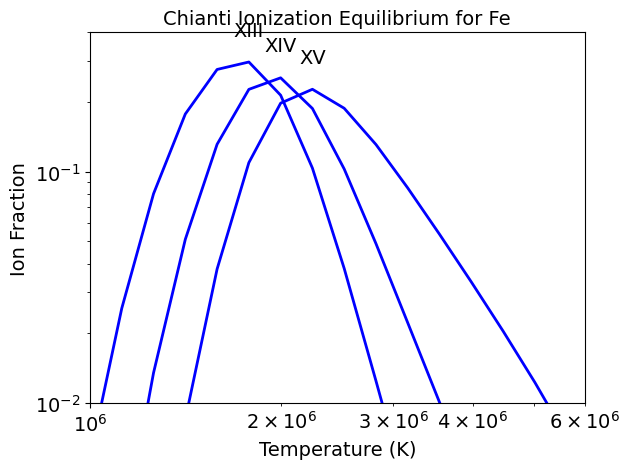

In [8]:
plt.figure()
fe.plot(stages=[13,14,15],tRange=[1.e+6, 6.e+6], yr = [1.e-2, 0.4])
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


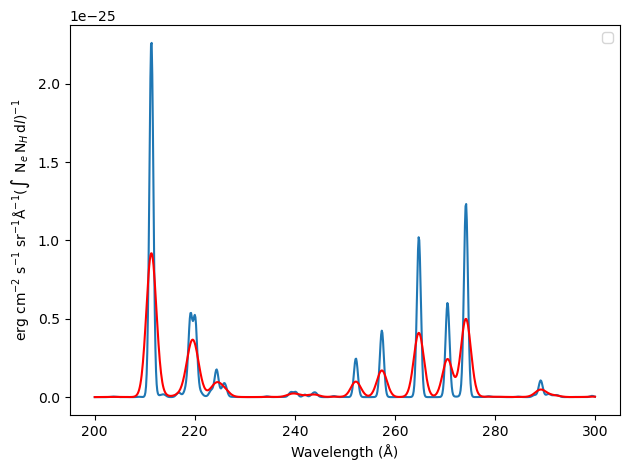

In [12]:
temp = 10.**(5.8 + 0.1*np.arange(11.))
dens = 1.e+9
fe14 = ch.ion('fe_14', temp, dens)
emeas = np.ones(11,'float64')*1.e+27
wvl = 200. + 0.125*np.arange(801)
fe14.spectrum(wvl,filter=(chfilters.gaussian,.4),label='.4')
fe14.spectrum(wvl,filter=(chfilters.gaussian,1.),label='1.')
plt.plot(wvl,fe14.Spectrum['.4']['intensity'][5])
plt.plot(wvl,fe14.Spectrum['1.']['intensity'][5],'-r')
plt.xlabel(fe14.Spectrum['.4']['xlabel'])
plt.ylabel(fe14.Spectrum['.4']['ylabel'])
plt.legend(loc='upper right')
plt.tight_layout()